In [32]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
games = pd.DataFrame(columns=[
    "GameID",
    "Player1",
    "Player2",
    "Winner",
    "WinnerType",
    "Start Point"
])

In [24]:
class tictactoe:

    def __inti__(self):
        print("Game start")

    def get_board(self):
        board = [
            [None, None, None],
            [None, None, None],
            [None, None, None],
        ]
        return board
    
    def add_game(self,player1,player2,winner,winnerType,start):
        games.loc[len(games)] = {
            "GameID": len(games)+1,
            "Player1":player1,
            "Player2":player2,
            "Winner":winner,
            "WinnerType":winnerType,
            "Start Point":start
        }
        
    def add_game_check(self,winner,winnerType,start):
        if winner == "Draw":
            winnerType = None
            self.add_game("Human","Bot",winner,winnerType,start)
            return
        if winner == "P":
            winnerType = "Human"
            self.add_game("Human","Bot",winner,winnerType,start)
            return
        if winner == "B":
            winnerType = "Bot"
            self.add_game("Human","Bot",winner,winnerType,start)
            return
    
    def start_player(self):
        mode = int(input("type 1 to play with a bot \ntype 2 to play with another player"))
        if mode == 1:
            return 'B'
        else:
            return input("choose to start as 'X' or 'O':")

    def get_winner(self,board):
        """Determines the winner of the given board.
        Returns 'X', 'O', or None."""
        #player = "X"

        row = 3
        col = 3
        winCheck = True
        check = []
        rowCheck = []
        colCheck = []
        diaCheck = [[],[]]
        #put roll in check list
        for i in range(row):
            rowCheck.append(board[i])
        #print(rowCheck)

        #put colume in check list 
        cols = zip(rowCheck[0],rowCheck[1],rowCheck[2])
        colCheck = list(cols)

        #print(check)
        #put diagonal in check list
        #print(diaCheck)
        for i in range(row):
            for j in range(col):
                if i == j:
                    diaCheck[0].append(board[i][j])
                if i == 2-j:
                    diaCheck[1].append(board[i][2-j])
        #print(diaCheck)

        check = rowCheck + colCheck + diaCheck
        #print(check)

        for pos in check:
            if pos[0] == pos[1] == pos[2] and pos[0] != None:
                winCheck = True
                print("player", pos[0], "wins the game")
                return pos[0]
        boardlist = []
        for n in board:
            for m in n:
                boardlist.append(m)
        if None not in boardlist:
                winCheck = False
                print("Draw")
                return 'Draw'
        
    def start_point(self,x,y):
        if x == y == 2:
            return "middle"   
        else:
            return "side"
        
    def play(self):
        board = self.get_board()
        winner = None
        winnerType = None
        Player = self.start_player()
        count = 0
        if Player == 'B':
            while winner == None:
                print("TODO: take a turn!")
                print("Your turn")
                for c in board:
                    print(c)
                #winner = self.get_winner(board)
                x = int(input("please input x value(1-3) of cell you want to place:"))
                if x<1 or x>3:
                    x = int(input("Invalide input, try again:"))
                y = int(input("please input y value(1-3) of cell you want to place:"))
                if y<1 or y>3:
                    y = int(input("Invalide input, try again:"))
                if count == 0: 
                    start = self.start_point(x,y)
                bx = self.bot_choice()
                by = self.bot_choice()   

                
                # TODO: Update the board.
                if board[x-1][y-1] == None:
                    board[x-1][y-1] = 'P'

                    
                    winner = self.get_winner(board)
                    if winner == "Draw" or winner == "P" or winner == "B":
                        for c in board:
                            print(c)
                        self.add_game_check(winner,winnerType,start)
                        return
                    #self.add_game_check(winner,winnerType,start)
                    while board[bx-1][by-1] != None:
                        #winner = self.get_winner(board)
                        bx = self.bot_choice()
                        by = self.bot_choice()
                        for c in board:
                            print(c)
                    board[bx-1][by-1] = 'B'
                    winner = self.get_winner(board)
                    if winner == "Draw" or winner == "P" or winner == "B":
                            self.add_game_check(winner,winnerType,start)
                            return
                        

                            
                    #winner = self.get_winner(board)
                    #self.add_game_check(winner,winnerType,start)

                    #board[bx-1][by-1] = 'B'
      
                else: 
                    print("The cell has been taken, choose another one.")
                count += 1
            for c in board:
                print(c)
            # TODO: Update who's turn it is.
                #winner = self.get_winner(board)
                
            #self.add_game("Human","Bot",winner,winnerType,start)
        else:
            while winner == None:
                print("TODO: take a turn!")
                print("player", Player)
                # TODO: Show the board to the user.
                for c in board:
                    print(c)
                # TODO: Input a move from the player.
            
                x = int(input("please input x value(1-3) of cell you want to place:"))
                if x<1 or x>3:
                        x = int(input("Invalide input, try again:"))
                y = int(input("please input y value(1-3) of cell you want to place:"))
                if y<1 or y>3:
                    y = int(input("Invalide input, try again:"))

                # TODO: Update the board.
                if board[x-1][y-1] == None:
                    board[x-1][y-1] = Player
                    winner = self.get_winner(board)
                    Player = self.other_player(Player)
                else: 
                    print("The cell has been taken, choose another one.")
                for c in board:
                    print(c)
                winner = self.get_winner(board)
            #self.add_game("Human","Human","Human")

    def other_player(self,player):
        """Given the character for a player, returns the other player."""
        if player == "X":
            player = "O"
            print("O's turn")
            return player
        if player == "O":
            player = "X"
            print("X's turn")
            return player

    def bot_choice(self):
        num = random.randint(1,3)
        return num


In [58]:
if __name__ == '__main__':
    game = tictactoe()
    game.play()
games

type 1 to play with a bot 
type 2 to play with another player1
TODO: take a turn!
Your turn
[None, None, None]
[None, None, None]
[None, None, None]
please input x value(1-3) of cell you want to place:1
please input y value(1-3) of cell you want to place:2
TODO: take a turn!
Your turn
[None, 'P', None]
[None, None, None]
[None, None, 'B']
please input x value(1-3) of cell you want to place:2
please input y value(1-3) of cell you want to place:2
TODO: take a turn!
Your turn
[None, 'P', None]
[None, 'P', None]
['B', None, 'B']
please input x value(1-3) of cell you want to place:2
please input y value(1-3) of cell you want to place:3
TODO: take a turn!
Your turn
[None, 'P', None]
['B', 'P', 'P']
['B', None, 'B']
please input x value(1-3) of cell you want to place:1
please input y value(1-3) of cell you want to place:3
[None, 'P', 'P']
['B', 'P', 'P']
['B', None, 'B']
[None, 'P', 'P']
['B', 'P', 'P']
['B', None, 'B']
[None, 'P', 'P']
['B', 'P', 'P']
['B', None, 'B']
[None, 'P', 'P']
['B', 

,GameID,Player1,Player2,Winner,WinnerType,Start Point
0,1,Human,Bot,P,Human,side
1,2,Human,Bot,P,Human,middle
2,3,Human,Bot,Draw,None,middle
3,4,Human,Bot,B,Bot,side
4,5,Human,Bot,Draw,None,side
5,6,Human,Bot,P,Human,middle
6,7,Human,Bot,P,Human,side
7,8,Human,Bot,P,Human,side
8,9,Human,Bot,Draw,None,side
9,10,Human,Bot,P,Human,side


In [83]:
games

,GameID,Player1,Player2,Winner,WinnerType,Start Point
0,1,Human,Bot,P,Human,side
1,2,Human,Bot,P,Human,middle
2,3,Human,Bot,Draw,None,middle
3,4,Human,Bot,B,Bot,side
4,5,Human,Bot,Draw,None,side
5,6,Human,Bot,P,Human,middle
6,7,Human,Bot,P,Human,side
7,8,Human,Bot,P,Human,side
8,9,Human,Bot,Draw,None,side
9,10,Human,Bot,P,Human,side


In [60]:
win_rateP = len(games[games["Winner"] == "P"])/len(games)
win_rateB = len(games[games["Winner"] == "B"])/len(games)
win_rateD = len(games[games["Winner"] == "Draw"])/len(games)

In [79]:
winCase = games[games["Winner"]!="Draw"]
win_rateS = len(games[games["Start Point"] == "side"])/len(games)
win_rateM = len(games[games["Start Point"] == "middle"])/len(games)


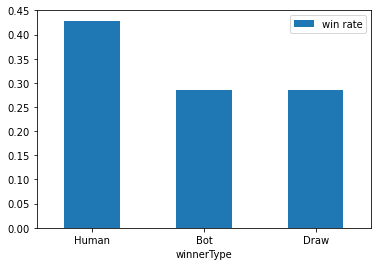

In [98]:
df = pd.DataFrame({'winnerType':["Human","Bot","Draw"], 'win rate':[win_rateP,win_rateB,win_rateD]})
ax = df.plot.bar(x = 'winnerType', y='win rate', rot=0)

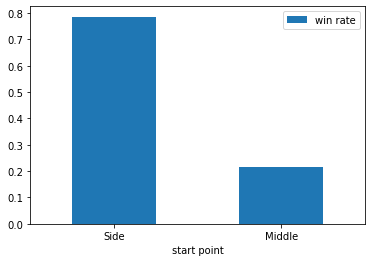

In [99]:
df = pd.DataFrame({'start point':["Side","Middle"], 'win rate':[win_rateS,win_rateM]})
ax = df.plot.bar(x = 'start point', y='win rate', rot=0)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]


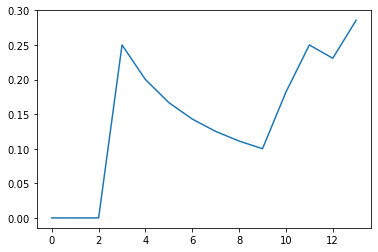

In [132]:
#Win rate of the bot changes
#Bot wins rate
games[["Winner","WinnerType"]]
bot_wins = []
win = 0
i = 1
bot_wins_rate = []
#games[["Start Point"] == 'middle']
for i in range(1,len(games)+1):        
    if games.loc[i-1]["WinnerType"] == 'Bot':
        bot_wins.append(1)
        win +=1
        bot_wins_rate.append(win/i)
    else:
        bot_wins.append(0)
        bot_wins_rate.append(win/i)
print(bot_wins)
games["Bot_wins"] = bot_wins
games["Bot_wins_rate"] = bot_wins_rate

#plot bot wins rate
lines = games["Bot_wins_rate"].plot.line()